# Bike Rental Project

## Exploratory data analysis

In [34]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("./biking_dataset.csv", sep= ";")

In [5]:
df.shape

(900, 8)

In [6]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,"2,25",High,"22,63"
1,San Francisco,Cloudy,39.0,Standard,5.0,"21,67",Medium,"7,87"
2,Berlin,Sunny,43.0,Electric,106.0,"28,4",High,"39,4"
3,San Francisco,Cloudy,24.0,Standard,119.0,"5,66",Low,"37,63"
4,New York,Sunny,24.0,Mountain,11.0,"25,74",Low,"13,12"


In [7]:
df.tail()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
895,New York,Rainy,55.0,Electric,55.0,"28,35",Medium,"26,3"
896,London,Cloudy,47.0,Mountain,14.0,"11,99",High,"13,78"
897,San Francisco,Sunny,49.0,Mountain,23.0,"2,78",High,"20,47"
898,Chicago,Sunny,19.0,Mountain,110.0,"2,27",High,"39,62"
899,Dublin,Rainy,37.0,Standard,17.0,"9,7",Medium,"13,02"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    object 
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    object 
dtypes: float64(2), object(6)
memory usage: 56.4+ KB


It can be seen that there are missing values in all of the features, as the number of observations is 900 but the maximum number of observations here is 890. 
It can also be seen that some variables that should be numerical, are being taken as if they were categorical.

In order to change the categorical variables into numerical, I will check the cleanliness of the data. I want to know whether the features not only contain commas, but they also contain dots, which might make the interpretation difficult.

In [19]:
df[df["Bike Rental Cost ($)" ].str.find(".") != -1] #Return all rows where a dot is found in Bike Rental Cost 

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
179,Berlin,Sunny,59.0,Mountain,72.0,"24,96",NaN,NaN
251,London,Cloudy,18.0,Electric,68.0,"15,57",NaN,NaN
342,NaN,Rainy,21.0,Standard,83.0,"28,77",Medium,NaN
463,San Francisco,NaN,57.0,Electric,92.0,"19,05",Low,NaN
630,San Francisco,Snowy,43.0,Standard,113.0,"27,45",NaN,NaN
660,Berlin,Sunny,18.0,Electric,69.0,"15,1",NaN,NaN
794,San Francisco,Cloudy,NaN,Mountain,88.0,"20,44",Low,NaN
856,Chicago,NaN,25.0,Standard,32.0,"3,45",Medium,NaN


In [21]:
df[df["Distance Covered (km)" ].str.find(".") != -1] #I do the same for the distance.

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
15,New York,NaN,41.0,Standard,53.0,NaN,Medium,"21,24"
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
119,Dublin,Cloudy,49.0,Mountain,119.0,NaN,Medium,"40,66"
218,NaN,Sunny,31.0,Standard,61.0,NaN,Medium,"20,23"
284,Berlin,Rainy,NaN,Mountain,73.0,NaN,High,"32,13"
295,Berlin,Sunny,60.0,Standard,NaN,NaN,Medium,"35,56"
308,New York,Snowy,37.0,NaN,97.0,NaN,Low,"33,4"
367,Berlin,NaN,51.0,Mountain,65.0,NaN,High,"28,31"
434,San Francisco,Snowy,41.0,Standard,NaN,NaN,Medium,"18,26"
446,Chicago,Snowy,NaN,Standard,16.0,NaN,High,"13,03"


All of the values are NA, so I can proceed to convert into numerical.

In [24]:
#Replace the , for a . and change the type to numerical
df["Bike Rental Cost ($)" ] =  df["Bike Rental Cost ($)"].str.replace(",",".").astype("float64")
df["Distance Covered (km)" ] =  df["Distance Covered (km)"].str.replace(",",".").astype("float64")


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


I have noticed that some cyclists have a very short time for the distance they have covered. For example, in the line 1. 5 minutes for 21,67 km. That would mean that person went at 260 Km/hour. I will create a new feature, speed. 

In [41]:
df ["Speed km/h"] = df["Distance Covered (km)"]/(df["Ride Duration (min)"]/60)

In [43]:
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63,2.177419
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87,260.040000
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40,16.075472
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63,2.853782
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12,140.400000
...,...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30,30.927273
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78,51.385714
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47,7.252174
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62,1.238182


<Axes: >

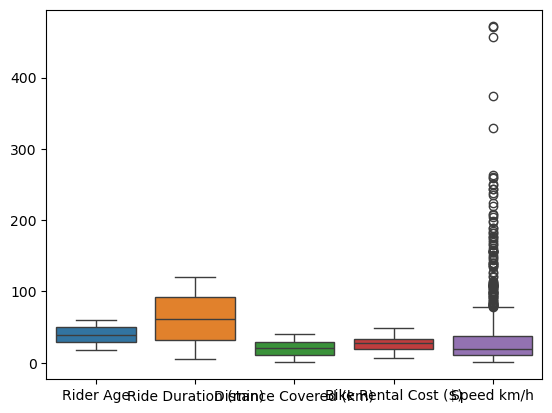

In [45]:
sns.boxplot(data=df)